In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
data.dropna(inplace=True)


In [5]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [6]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [8]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
148,6.2,3.4,5.4,2.3,2


One hot Encoding

In [9]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)

x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()

In [13]:
model= clf.fit(x_train,y_train)

In [14]:
y_pred=model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))


Accuracy =  1.0


In [16]:
print(y_pred)

[1 0 0 0 2 1 1 2 1 0 2 0 1 0 2 2 0 1 2 1 0 0 2 0 2 1 1]


In [17]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors= np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  model=classifier.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [19]:
metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

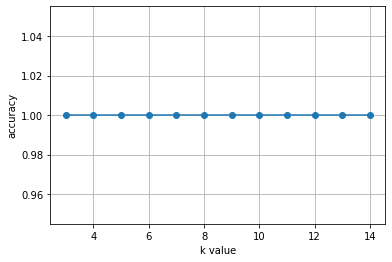

In [20]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [21]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [22]:

print('Accuracy = ',accuracy_score(y_test,y_pred))


Accuracy =  1.0


In [23]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

SVM

In [24]:
from sklearn.svm import SVC
svmclf= SVC(kernel= 'linear')
svmclf.fit (x_train,y_train)

SVC(kernel='linear')

In [25]:
y_pred_svm= svmclf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))


Accuracy =  1.0


In [27]:
print(confusion_matrix(y_test,y_pred_svm))

[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]


rbf

In [30]:
from sklearn.svm import SVC
svmclf= SVC(kernel= 'rbf')
svmclf.fit (x_train,y_train)

SVC()

In [31]:
y_pred_svm= svmclf.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))


Accuracy =  1.0


In [33]:
print(confusion_matrix(y_test,y_pred_svm))

[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]


Polynomial

In [34]:
from sklearn.svm import SVC
svmclf= SVC(kernel= 'poly')
svmclf.fit (x_train,y_train)

SVC(kernel='poly')

In [35]:
y_pred_svm=svmclf.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))


Accuracy =  0.9259259259259259


In [37]:
print(confusion_matrix(y_test,y_pred_svm))

[[10  0  0]
 [ 0  9  0]
 [ 0  2  6]]


Desicion Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred_dt= dt_clf.predict(x_test)

In [40]:
print('Accuracy =',accuracy_score(y_test,y_pred_dt))


Accuracy = 1.0


In [41]:
print(confusion_matrix(y_test,y_pred_dt))

[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]


Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred_rf= rf_clf.predict(x_test)

In [44]:
print('Accuracy =',accuracy_score(y_test,y_pred_rf))

Accuracy = 1.0


In [45]:
print(confusion_matrix(y_test,y_pred_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]
